# Project: Investigate TMDb movie Database
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by their community, dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched. In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important details of about 10k+ movies, including their details of budget, revenue, release dates, etc.

In [1]:
import pandas as pd 

#reading tmdb csv file and storing into variable
movie_data = pd.read_csv('tmdb-movies.csv')

#calling out first 50 rows (excluding headers) of tmdb database
movie_data.head(51)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### What can we say about the dataset?
<ul>
    <li>The vote count for each movie is not similar, for example, the movie `Mad Max : Fury Road` has `6k+` votes while `The Last Witch Hunter` has only `879 votes` (as seen above). Since the votes of the movies vary so much the `vote_average` column also is effected by it. So we cannot calculate or assume that movie with highest votes or rating was more successful since the voters of each film vary.</li>
    <li>The columns `budget`, `revenue`, `budget_adj`, `revenue_adj` has not given us the currency. So by default we will assume this to be doller.</li>
    
</ul>  

### What Questions can be brainstormed?
Looking at this database, we can think about-
<ul>
   <li>Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues</li>
<li>Which movie gained the most profit (or which movie has been the people's favourite?)</li>
<li>Which year the movies made the most profit?</li>
</ul>

### What needs to be Wrangled & Cleaned?
Based on the questions above, first of all we have to find out which columns in the datasets can be useful in answering these questions. After pondering about it, we have to remove the non-useful columns so that the dataframes should not look messy and can be easily understandable.
<ul>
<li>As you can see in this dataset of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.</li>

<li>Also this dataset has some duplicate rows. We have to clean that too for appropriate results.</li>

<li>We will calculate the average runtime of the movies so in that case if we have a runtime of a movie '0' then we need to replace it with `NaN`.</li>

<li>The `release_date` column must be converted into date format.</li>

<li>Checking if all columns are in the desired data type, if not then we have to change it.</li>

<li>Mentioning the country currency in the desired columns.</li>

<li>Finally, we will also remove unnecessory columns such as ` 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average` (Data trimming). </li>
</ul>




### Questions to be Answered
<ol>
    <li>General questions about the dataset.</li>
    <ol type = 'A'>
        <li>Which movie earns the most and least profit?</li>
        <li>Which movie had the greatest and least runtime?</li>
        <li>Which movie had the greatest and least budget?</li>
        <li>Which movie had the greatest and least revenue?</li>
        <li>What is the average runtime of all movies?</li>
        <li>In which year we had the most movies making profits?</li>
    </ol>
    <li>What are the similar characteristics does the most profitable movie have?</li>
    <ol type = 'A'>
        <li>Average duration of movies.</li>
        <li>Average Budget.</li>
        <li>Average revenue.</li>
        <li>Average profits.</li>
        <li>Which director directed most films?</li>
        <li>Whcih cast has appeared the most?</li>
        <li>Which genre were more successful?</li>
        <li>Which month released highest number of movies in all of the years? And which month made the most profit?</li>
    </ol>
</ol>
<br>

-----

<br>
## Data Cleaning

First, lets clean up the columns.
We will only keep the columns we need and remove the rest of them.

Columns to delete -  `id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.`

In [2]:
#importing all the nescessory libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# a list of movies that needs to be deleted
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns from the database
movie_data = movie_data.drop(del_col, 1)
#now take a look at this new dataset
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


Now the original dataset is more clear and easily understandable. Our next step will be to remove the duplicate entries (if any).
Now lets clean for any duplicate rows.

In [3]:
movie_data.drop_duplicates(keep = 'first', inplace = True)
movie_data

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,2015
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2015
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,9/30/15,2015
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,6/17/15,2015
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,6/9/15,2015


Now, lets figure out which movies have a value of `'0'` in their `budget` or `revenue`, and then we will delete those movies from dataset.

In [4]:
check_row = ['budget', 'revenue']    #list of column names that needs to be checked

#this will replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

#showing the dataset
movie_data

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
5,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,2015
6,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2015
7,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,9/30/15,2015
8,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,6/17/15,2015
9,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,6/9/15,2015


We have removed the non-required columns (data cleaning is done) and now we can move to Data Wrangling section.

<a id='wrangling'></a>
## Data Wrangling

Now first lets check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN (None).

In [5]:
#replacing 0 with NaN of runtime column of the dataframe
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

Now we need to convert the `'release_date'` column to date format

In [6]:
#calling the column which need to be formatted in datetime and storing those values in them
movie_data.release_date = pd.to_datetime(movie_data['release_date'])
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


As we can see, the `'release_date'` column has been changed to date format (year-month-day).

Lets see if all the columns are in the format that we want for our calculations.

In [7]:
#shwoing the datatypes of all the columns
movie_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

We can see that we have float values for `budget` and `revenue` columns, since we don't need in float but in int datatype, let's convert them.

In [8]:
change_coltype = ['budget', 'revenue']

#applymap function changes the columns data type to the type 'argument' we pass
movie_data[change_coltype] = movie_data[change_coltype].applymap(np.int64)

#shwoing the datatypes of all columns
movie_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

Now Since the values in the column '`budget`' and '`revenue`' shows us in Currency of US (as assumed earlier), lets change the name of these columns for convenience.

In [9]:
#rename function renames the columns, the key as being the old name and its value new name of it in form of dictionary.
movie_data.rename(columns = {'budget' : 'budget_(in_US$)', 'revenue' : 'revenue_(in_US$)'}, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

Lets figure out the profits of each movie.

In [10]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
movie_data.insert(2, 'profit', movie_data['revenue_(in_US$)'] - movie_data['budget_(in_US$)']) #create new entry in dataset

#for just in case situations or for convenience, we change the data type to int
movie_data['profit'] = movie_data['profit'].apply(np.int64)
movie_data.head()

,budget_(in_US$),revenue_(in_US$),profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


**Q1-A) Which movie earns the most and least profit?**

In [11]:
#a function which calculates lowest and highest values of columns taking column name as arguments

def highest_lowest(column_name):
    
    #highest : taking the index value of the highest number in profit column
    highest = movie_data[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(movie_data.loc[highest])
    
    #lowest
    #same processing as above
    lowest = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    return two_in_one_data

highest_lowest('profit')

,1386,2244
budget_(in_US$),237000000,425000000
revenue_(in_US$),2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The **first column** shows the highest profit made by a movie and **second column** shows the highest in loss movie in this dataset. 

As we can see the film Directed by `James Cameron`, `Avatar` has the highest profit in all, making over `$2.5B` in profit, in this dataset. 

And the most in loss movie in this dataset is `The Warriors Way`, going in loss by more than `$400M`, was directed by `Singmoo Lee`.

**Q1-B) Which movie had the greatest and least runtime?**

In [12]:
highest_lowest('runtime')

,2107,5162
budget_(in_US$),18000000,10
revenue_(in_US$),871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


The **first column** shows the runtime of the highest and **second  column**, the lowest with column names as the index number. 

So `Carlos` movie has the highest Runtime of `338 min`, that's approx 3.5 hrs.
The name of the movie with shortest runtime is `Kid's Story`, that's approx 15 min.

**Q1-C) Which movie had the greatest and least budget?**

In [13]:
highest_lowest('budget_(in_US$)')

,2244,2618
budget_(in_US$),425000000,1
revenue_(in_US$),11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


We can see that `The Warriors Way` had the highest budget of all movies in the dataset of about `$425M`. This same movie also had the highest loss. It may be because having the highest budget in all makes the movie more harder to have higher revenues and earn more profits.

And the least budget of all, the `Lost & Found` movie of `$1` has made me thinking how can a movie with `95 min` of runtime managed with such low budget! Also making revenue of `$100` and earning a profit `$99`, this may be a local movie release. Because it's kind of impossible to have such low budget and earning low revenues if it has released internationally.

**Q1-D) Which movie had the greatest and least budget?**

In [14]:
highest_lowest('revenue_(in_US$)')

,1386,5067
budget_(in_US$),237000000,6000000
revenue_(in_US$),2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


`Avatar` movie also earning the most profit, has made most revenue too! Making a revenue of more than `$2.7B`.
Having lowest revenue of `$2`, `Shattered Glass` movie seems like couldn't sell much tickets.

Let's keep exploring!

**Q1-E) What is the average runtime of all movies?**

In [15]:
#function which calculates average of a particular column
def average_func(column_name):
    return movie_data[column_name].mean()

In [16]:
#calling function to show the mean
average_func('runtime')

109.22029060716139

The average runtime of all movies in this dataset is 109 mins approx. We want to get a deeper look and understanding of runtime of all movies so Let's plot it.

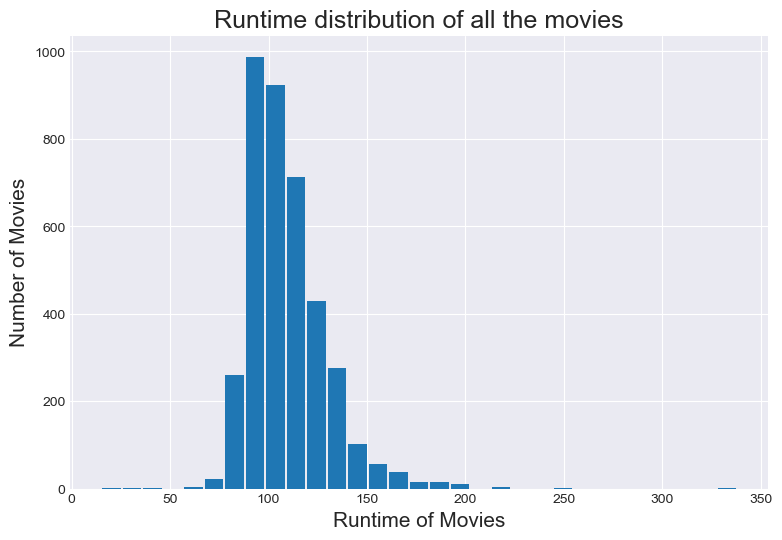

In [17]:
#plotting a histogram of runtime of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#changing the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

plt.figure(figsize=(9,6), dpi = 100)    #giving the figure size(width, height)
plt.xlabel('Runtime of Movies', fontsize = 15)   #x-axis label name
plt.ylabel('Number of Movies', fontsize=15)    #y-axis label name
plt.title('Runtime distribution of all the movies', fontsize=18)    #title of the graph

plt.hist(movie_data['runtime'], rwidth = 0.9, bins =31)    #giving a histogram plot
plt.show()    #displays the plot

The above graph shows us that how many movies lie between the time interval x1 to x2. For example, as you can see the tallest bar here is time interval between 85-100 min(approx) and around 1000 movies out of 3855 movies have the runtime between these time intervals. So we can also say from this graph that mode time of movies is around 85-110 min, has the highest concentration of data points around this time interval. The distribution of this graph is positively skewed or right skewed!

Let's dig deep and figure out the outliers of this distribution.

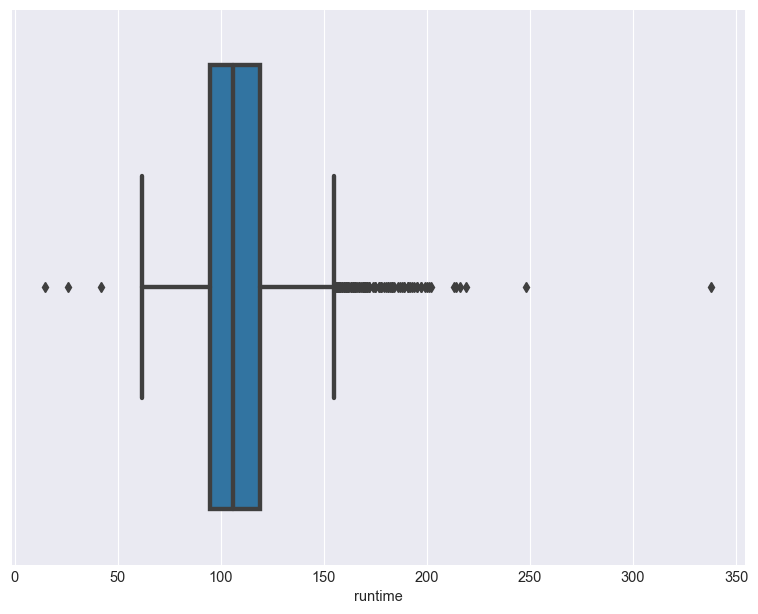

In [18]:
#giving two plots, thr first is the box plot, second is plots of runtime for movies
plt.figure(figsize=(9,7), dpi = 105)    #giving figure size
sns.boxplot(movie_data['runtime'], linewidth = 3)   #using seaborn to plot box plot
plt.show()    #showing the plot1

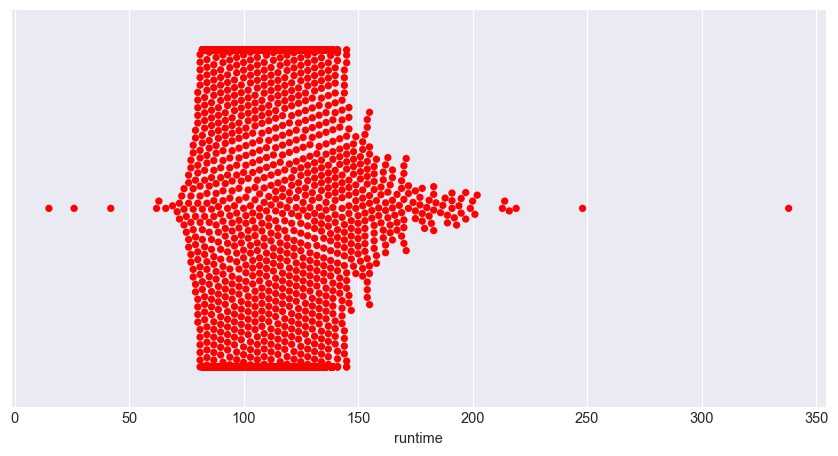

In [19]:
#plots the data points of runtime of movies

#giving figure size
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(movie_data['runtime'], color = 'red')
plt.show()    #showing plot2

In [20]:
#getting specific runtime points at x positions
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Both visualizations above shows us the overall distribution of runtime of movies by plotting the points where they lie in the ditribution and how many movies percent of movies lie below the runtime.

What's amazing about box-plot is that it gives us an overall idea of how spread the ditribution in our case the runtime of movies are. First of all what we get from this visualization is how many outliers we have, the min and max points, the median and IQR.

As we already saw in our previous calculations of least and highest runtime, this is the appropriate visualization in the comparison of other movies runtime. By looking at the box-plot we don't get the exact values but by giving the describe function above we get the exact values.

So by looking at both, visualiztions and calculations, we can say that..
<ul>
    <li>There are 25% of movies having a runtime of less than `95 min`</li>
    <li>There are 50% of movies having a runtime of less than `109 min` (median). </li>
    <li>There are 75% of movies having a runtime of less than `119 min`</li>
    <li>50% of movies have a runtime of between 95 min and `119 min`.</li>
</ul>

As we can see there are more movies after the 3rd quartile range than the 1st. This makes the mean of the runtime pull towards the right or increases it.

Moving futher,

**Q1-F) In which year we had the most movies making profits?**

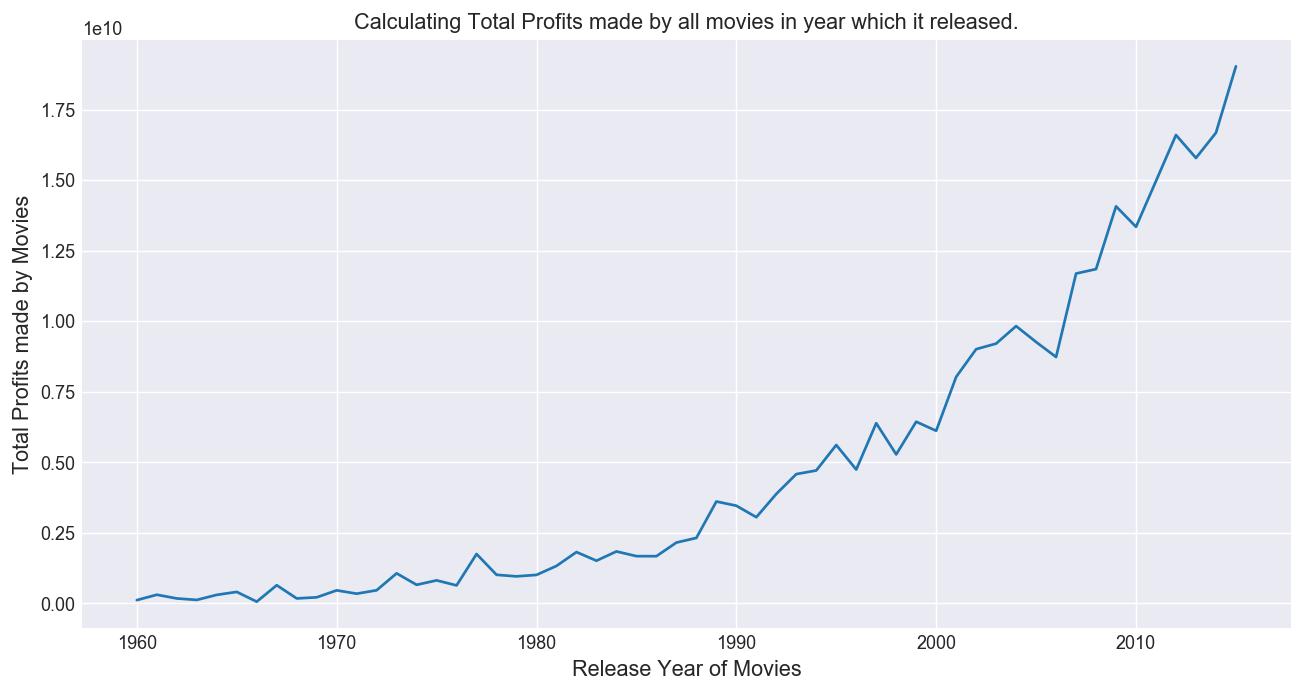

In [21]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = movie_data.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)    #giving the figure size(width, height)

plt.xlabel('Release Year of Movies', fontsize = 12)    #labeling x-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)   #labeling y-axis
plt.title('Calculating Total Profits made by all movies in year which it released.')    #title of a the plot
plt.plot(profits_each_year)    #plotting what needs to be plotted
plt.show()    #showing the plot

Each values in the y-axis is been multiplied to `'1e10'` (as shown above the plot). Since the profits of movies are high, having 9+ digits, cannot fit the axis.

* The year `2015`, shows us the highest peak, having the highest profit than in any year, of more than `18 billion dollars`. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. 
* At the year `2000`, profits were around `8 biilion dollars`, but in just 15 years it increased by 10+ biilion dollars. 
* Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.
* Not every year had same amount of movies released, the year `2015` had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

This dataset also doesn't show all the movies that has been released in each year. If it would the graph might would show some different trend.

Also to note, in the dataset, there were also movies that had negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie `Avatar` in 2009 alone drags the profit up by `2.5 billion dollars` out of `14 billion dollars`(calculations below).

For convenience, i have shown which year had the most profit. Also we will take a look at the profits of each year with exact figures.

In [22]:
#shows which year made the highest profit
profits_each_year.idxmax()

2015

In [23]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


`2015` was the year where movies made the highest profit of about `19+ billion dollars` which released in that year.

<br>
We are now done with exploring the dataset given. Next, we want to find similar characteristics of most profitable movies.

<br>
**Q2-A) Average runtime of successful movies**

Before answering this question, we need to first clean the dataset so we only have the data of movies that made profit not loss. Also we need movies not only who just made profit by some dollars but we need movies who made significant profits and then analyzing similar characteristics of it.

**Let's take only the movies who made profits of 50M dollars or more.**

In [24]:
#assinging new dataframe which holds values only of movies having profit $100k or more
profit_movie_data = movie_data.query('profit >= 50000000')

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

#showing the dataset
profit_movie_data.head(2)

,budget_(in_US$),revenue_(in_US$),profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [25]:
#number of rows of a dataframe
len(profit_movie_data)

1338

In [26]:
def prof_avg_fuc(column_name):
    return profit_movie_data[column_name].mean()

In [27]:
#mean of runtime
prof_avg_fuc('runtime')

113.66741405082212

The mean time for movies making significant profits is likely similar to the mean runtime of movies that we found before of `109.2` which included movies having less than $50M profits. Difference is of 4 minutes.

**Q2-B) Average Budget of Movies**

In [28]:
#calling the function
prof_avg_fuc('budget_(in_US$)')

60444957.76083707

The average budget of movies of $50M club in profit is around `$60M dollars`.

**Q2-C) Average Revenue of Movies**

In [29]:
#calling the function
prof_avg_fuc('revenue_(in_US$)')

254957662.59491777

The average revenue of movies of $50M club in profit is around `$255M dollars`.

**Q2-D )Average Profit of Movies**

In [31]:
#calling the function
prof_avg_fuc('profit')

194512704.83408073

The average profits of movies of $50M club in profit is around `$194M dollars`.

**Q2-E) Which directer directed most films?**

In [30]:
#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))    #giving pandas series and storing the values separately
    count = all_data.value_counts(ascending = False)    #this will us value in descending order
    
    return count

In [32]:
#this variable will store the return value from a function
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

`'Steven Spielberg'` takes the crown! Directing `23 movies` over `$50M+` in profit is no joke! Also the other directors following along the list such as `'Robert Zemeckis', 'Clint Eastwood', 'Tim Burton' etc` prove to be really great directors. Movies directed by these directors is more likely for a movie to make huge profits, the higher the movies they direct that earn huge profits, the higher the probability for a movie to go for success! Since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always earn this much but gives us the idea that how much likely it is when it is directed by them.

**Q2-F) Whcih cast has appeared the most?**

In [33]:
#this will variable will store the return value from a function
cast_count = extract_data('cast')
#shwoing top 5 values
cast_count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

**Q2-G) Which genre were more successful?**

In [34]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

Lets visualize this with a plot.

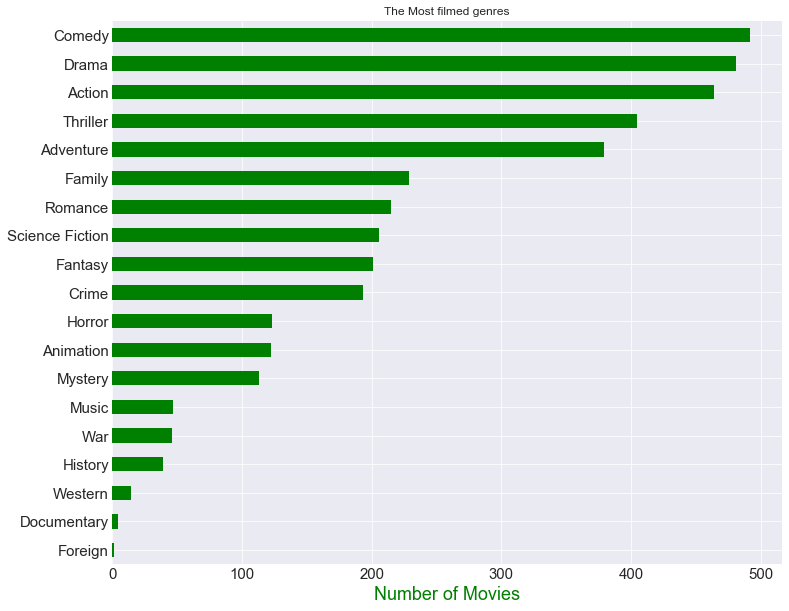

In [35]:
#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

ax = genre_count.plot.barh(color = 'green', fontsize = 15)    #initializing plot
ax.figure.set_size_inches(12, 10)    #giving the figure size(width, height)
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')    #x-label
ax.set(title = 'The Most filmed genres')    #giving a title

#shwoing the plot
plt.show()

So, `Action, Drama and Comedy genres` are the most as visualized but Comedy takes the prize, about `492 movies` have genres comedy which make $50M+ in profit. In comparison, even `Adventure` and `Thriller` really play the role. These five genres have more number of movies than rest of the genres as shown by visualization. Probability of earning more than \$50M for these genres are higher, but still other genres do count too again it depends on lots of other influential factors that come in play. `Western, war, history, music, documentary` and the most least `foreign` genres have less probability to make this much in profit as in comparison to other genre.

This also doesn't prove that if you have a movie with an `Action, comedy and drama` genre in it will have a guarantee to make more than $50M but it would have a significant interest and attraction to the population.

**Q2-H) Which month released highest number of movies in all of the years? And which month made the most profit?**

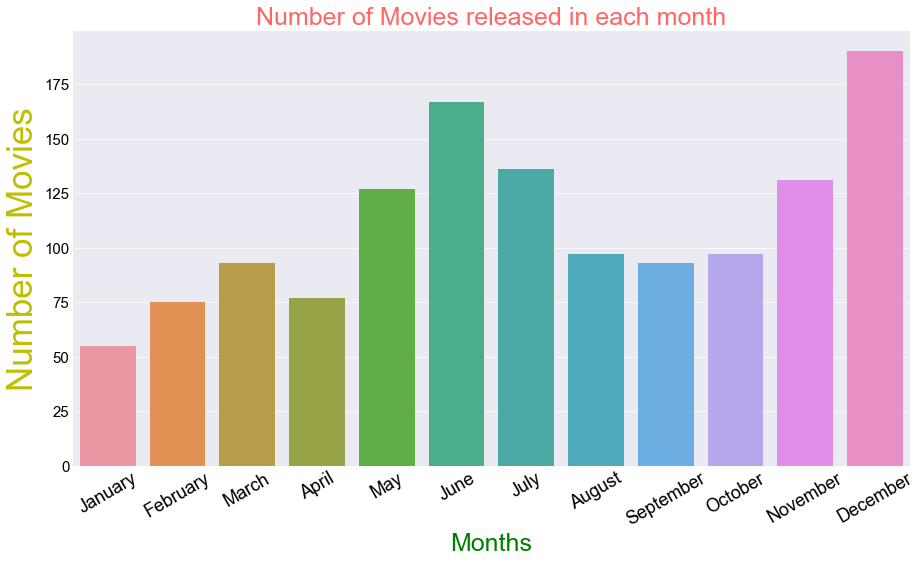

In [36]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_movie_data.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index.profit.count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count.profit, data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)    #setting x-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)    #setting y-label

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)
#display
plt.show()

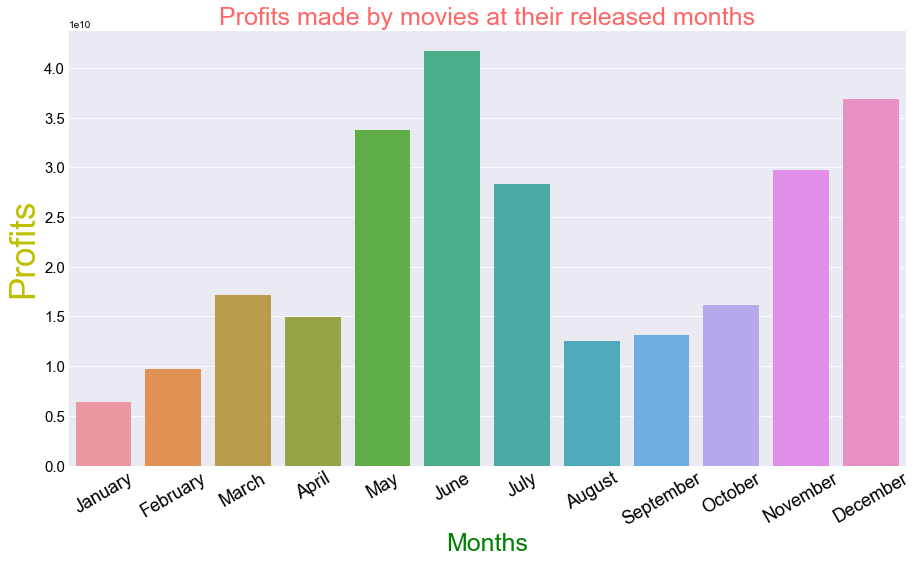

In [37]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit' values to respective months, saving all this to a new variable
monthly_profit = groupby_index.profit.sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit.profit, data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

Seeing the both visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa but just not for one month i.e `December`. December is the month where most movie release but when compared to profits it ranks second. This means that december month has high release rate but less profit margin. The month of June where we have around `165 movie` releases, which is second highest, is the highest in terms of making profits.

Also one more thing is we earlier finded which movie had made the most profit in our dataset, We came up with the answer of movie, `'Avatar'`, and the release month for this movie is in december, also the highest in loss movie had also released in december but that isn't being counted here. Knowing this that you have the highest release rate and highest profit making movie in same month of `December` but falls short in front of `June` month in terms of making profits makes me think that the month of June had movies with significant high profits where in december it didn't had that much high, making it short in terms of profit even though having the advantage of highest release rate.

This visualization doesn't prove us that if we release a movie in those months we will earn more $50M. It just makes us think that the chances are higher, again it depends on other influential factors, such as directors, story, cast etc.
<br>

--------

<br>
<a id='conclusions'></a>
## Conclusion

If one who wants to show one of the best and most profitable movie, he can:

** -Choose any director from this** - Steven Spielberg, Robert Zemeckis, Ron Howard, Tony Scott, Ridley Scott.

** -Choose any cast from this** - Actors - Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Denzel Washington.

                         Actress - Julia Roberts, Anne Hathaway, Angelina Jolie, Scarlett Johansson.
                            
** -Choose these genre** - Action, Adventure, thriller, Comedy, Drama.

** -Choose these release months** - May, June, July, November, December.

By doing all this, his probability of making a profitable movie would be higher. And also the runtime of the movie should be around 110 min (mean runtime of movies with \$50M+). 

## Reference
* [About pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
* [About pandas visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)
* [About TMDb](https://www.themoviedb.org/about?language=en)
* [Dataset download link](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1520456065743000&usg=AFQjCNE04YzC40qAErEhbIdpbYEsN6oVKA)
* [Pandas Drop.Duplicate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)
* [Stackoverflow](https://stackoverflow.com/questions/48066517/python-pandas-pd-read-excel-giving-importerror-install-xlrd-0-9-0-for-excel)